In [ ]:
using Revise
using FUSE
using Plots;
FUSE.logging(Logging.Info; actors=Logging.Info);

In [ ]:
# sty is the act equivalent for a study, it has common parameters like server and n_workers but also study dependent parameters like n_simulations
sty,act = FUSE.study_parameters(:DatabaseGenerator);
sty

In [ ]:
# Interacting with sty
sty.server = "saga"
sty.n_workers = 2

sty.save_folder = "/mnt/beegfs/users/neisert/ODSs/ukaea/seq-1"

sty.release_workers_after_run = true # this is the default behavior and releases workers after running the study

sty.n_simulations = 4

sty

┌ Warning: profiles_1d[]&ion[]&velocity_pol: ErrorException("type core_profiles__profiles_1d___ion has no field velocity_pol")
└ @ IMASDD ~/.julia/dev/IMASDD/src/io.jl:564
┌ Warning: profiles_1d[]&ion[]&velocity_tor: ErrorException("type core_profiles__profiles_1d___ion has no field velocity_tor")
└ @ IMASDD ~/.julia/dev/IMASDD/src/io.jl:564
┌ Warning: time_slice[]&profiles_2d[]&b_r: ErrorException("type equilibrium__time_slice___profiles_2d has no field b_r")
└ @ IMASDD ~/.julia/dev/IMASDD/src/io.jl:564
┌ Warning: time_slice[]&profiles_2d[]&b_tor: ErrorException("type equilibrium__time_slice___profiles_2d has no field b_tor")
└ @ IMASDD ~/.julia/dev/IMASDD/src/io.jl:564
┌ Warning: time_slice[]&profiles_2d[]&b_z: ErrorException("type equilibrium__time_slice___profiles_2d has no field b_z")
└ @ IMASDD ~/.julia/dev/IMASDD/src/io.jl:564
┌ Warning: fusion&neutron_fluxes&dd&thermal&value: ErrorException("type summary__fusion has no field neutron_fluxes")
└ @ IMASDD ~/.julia/dev/IMASDD/src/i

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 3.6 [m]                   B0 → -3.2 [T]                  Te0 → 22.4 [keV]               ne0 → 1.28e+20 [m⁻³]           
a → 2 [m]                      ip → -13.2 [MA]                Ti0 → 16.5 [keV]               ne_ped → 7.08e+19 [m⁻³]        
1/ϵ → 1.8                      q95 → 13.4                     <Te> → 6.39 [keV]              <ne> → 1e+20 [m⁻³]             
κ → 2.8                        <Bpol> → -0.629 [T]            <Ti> → 5.7 [keV]               ne0/<ne> → 1.27                
δ → -0.011                     βpol_MHD → 0.815               Te0/<Te> → 3.5                 fGW → -1.07                    
ζ → 0.000205                   βtor_MHD → 0.0552              Ti0/<Ti> → 2.9                 zeff_ped → NaN                 


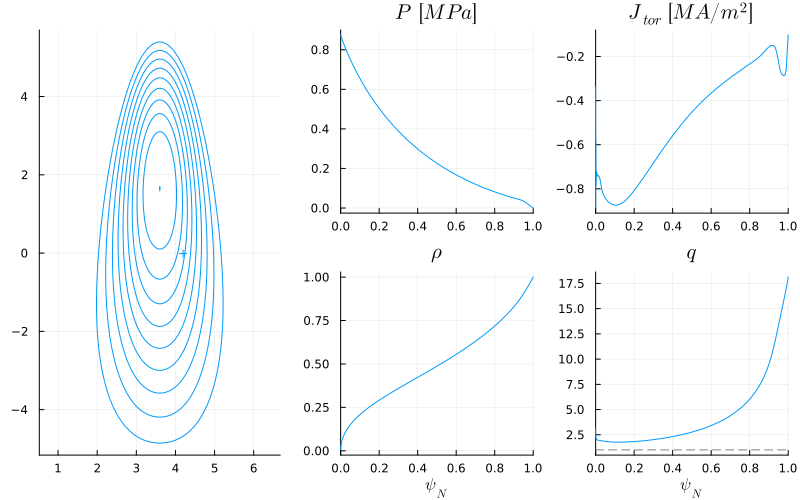

​


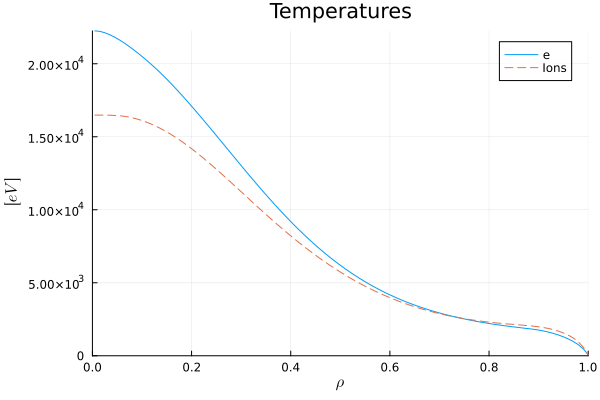

​


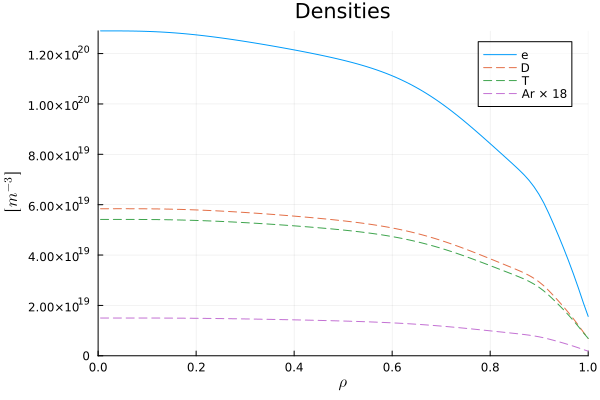

​


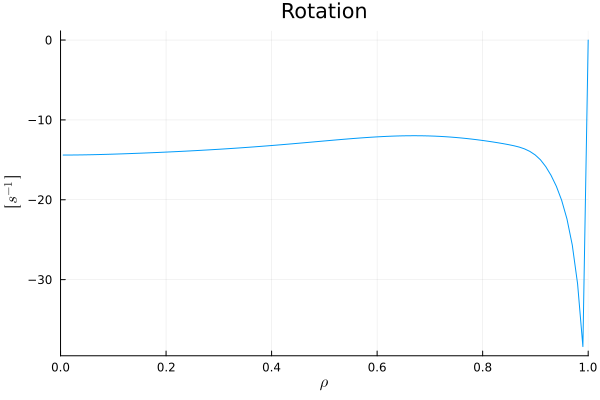

​


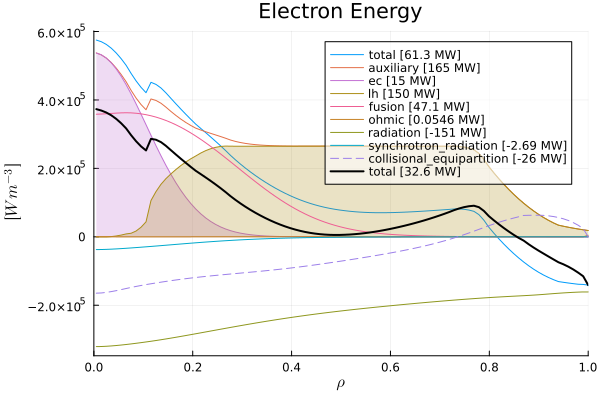

​


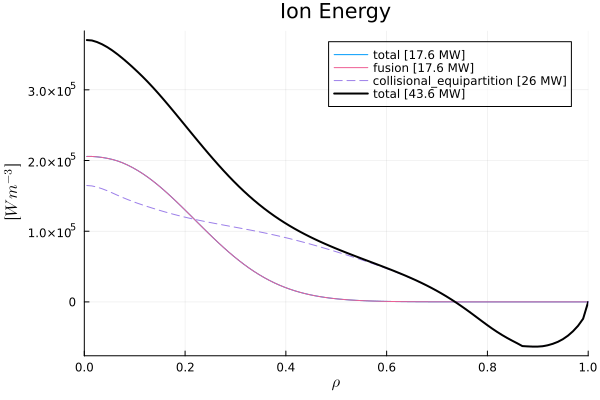

​


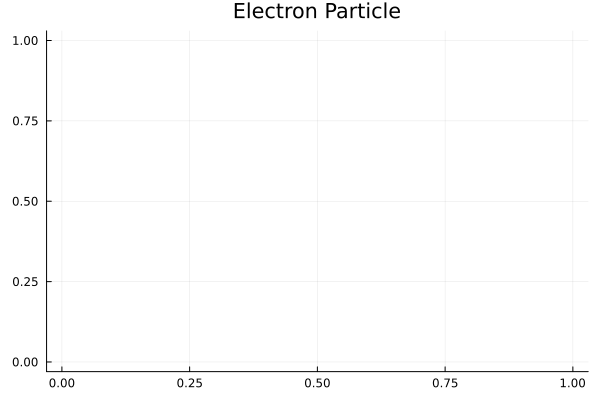

​


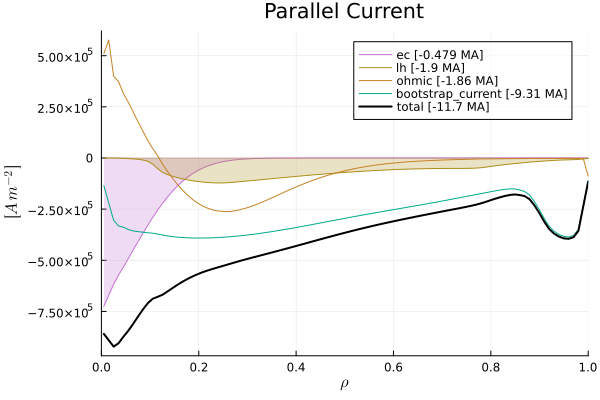

​


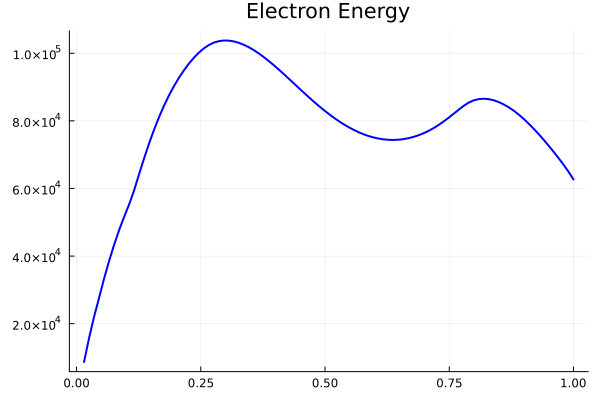

​


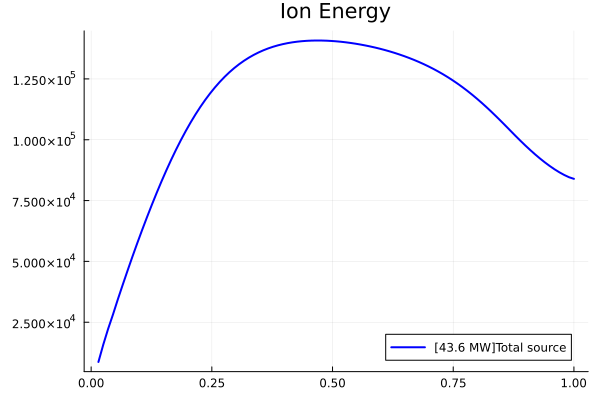

​


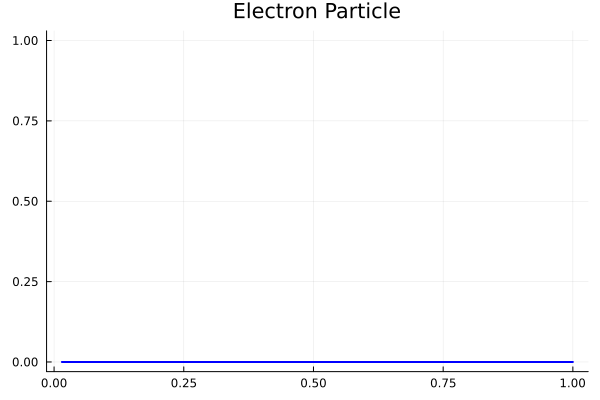

​


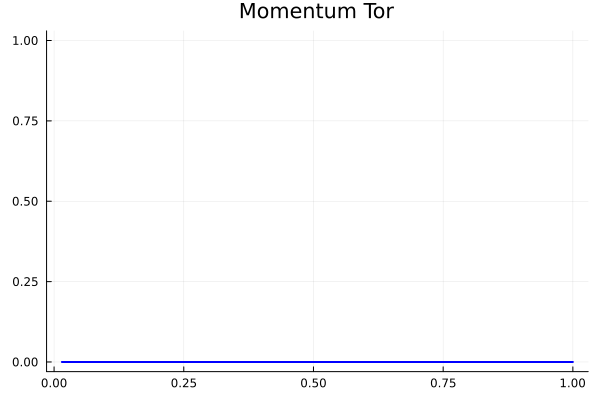

​


LoadError: Flux surface at ψ=-6.681343952336757e-9 is not open; ψ=[29.661506657140567...-1.6379236747388156e-5]

In [101]:
dd = IMAS.h5i2imas("/mnt/beegfs/users/neisert/ODSs/ukaea/seq-2/master.h5");
dd.global_time = 2000.
FUSE.digest(dd)

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 3.6 [m]                   B0 → -3.2 [T]                  Te0 → 22.4 [keV]               ne0 → 1.28e+20 [m⁻³]           
a → 2 [m]                      ip → -13.2 [MA]                Ti0 → 16.5 [keV]               ne_ped → 7.08e+19 [m⁻³]        
1/ϵ → 1.8                      q95 → 13.4                     <Te> → 6.39 [keV]              <ne> → 1e+20 [m⁻³]             
κ → 2.8                        <Bpol> → -0.629 [T]            <Ti> → 5.7 [keV]               ne0/<ne> → 1.27                
δ → -0.011                     βpol_MHD → 0.815               Te0/<Te> → 3.5                 fGW → -1.07                    
ζ → 0.000205                   βtor_MHD → 0.0552              Ti0/<Ti> → 2.9                 zeff_ped → NaN                 


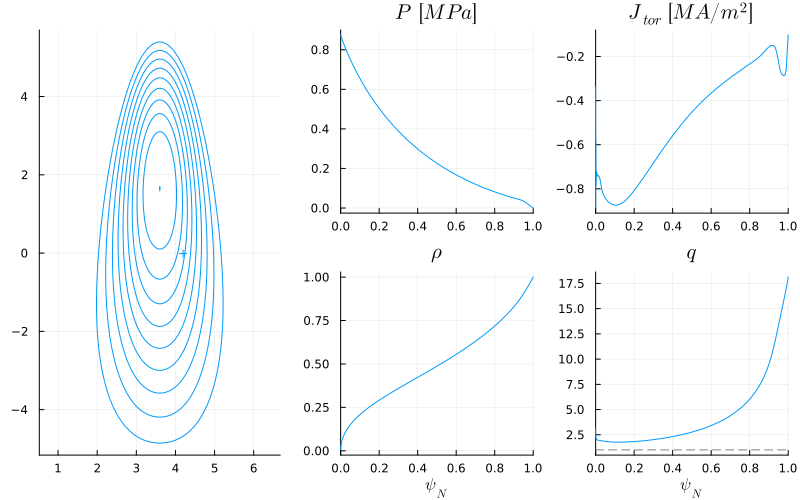

​


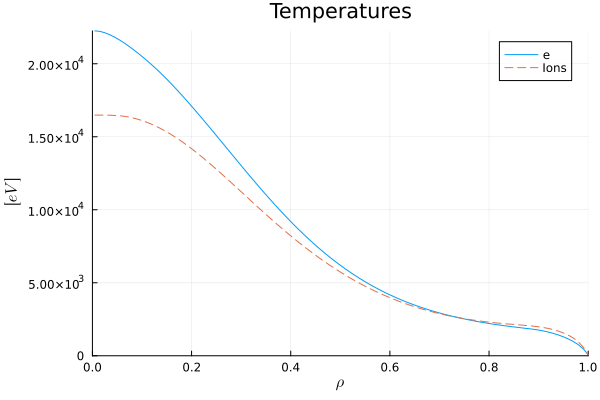

​


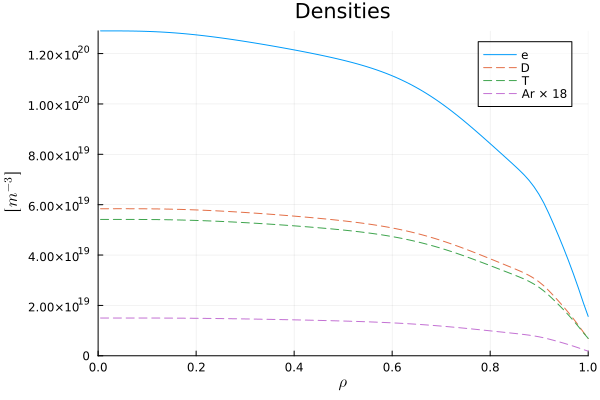

​


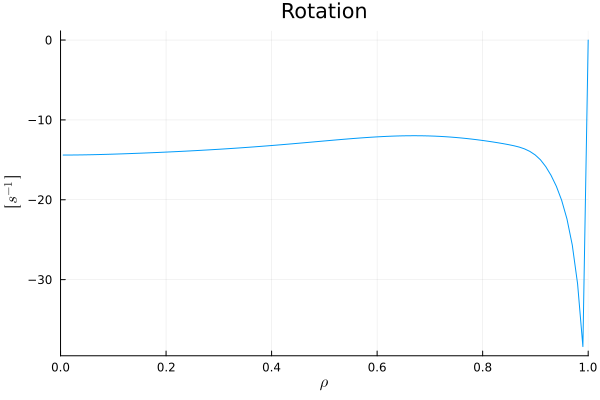

​


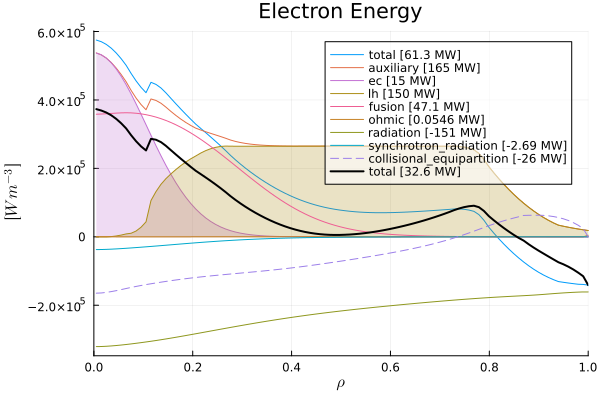

​


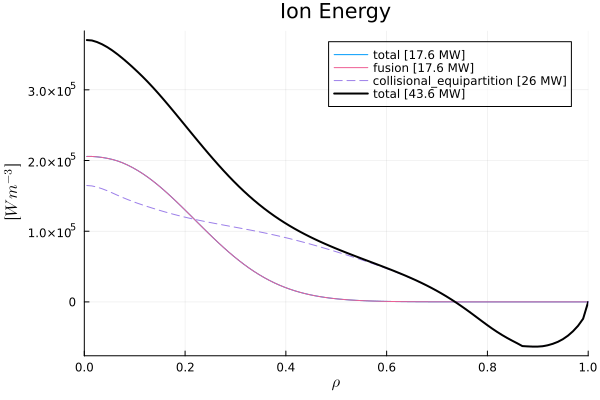

​


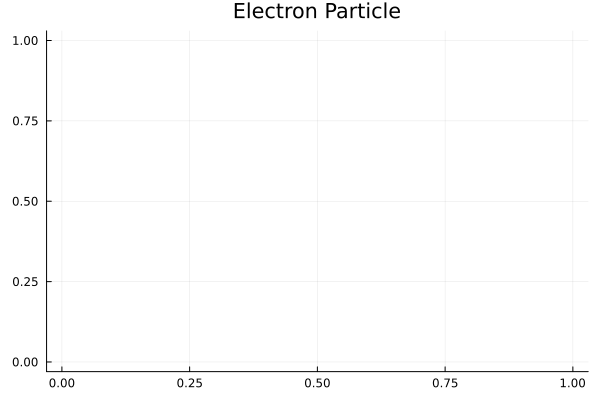

​


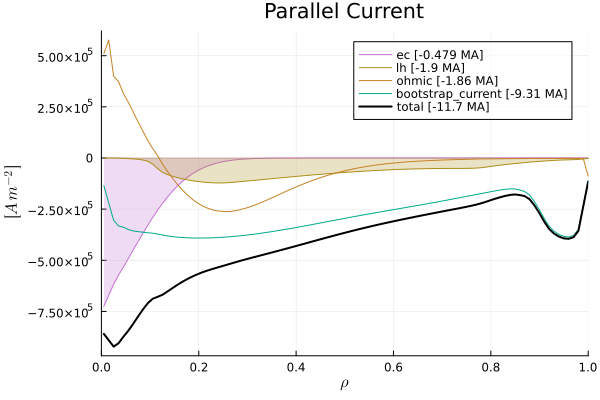

​


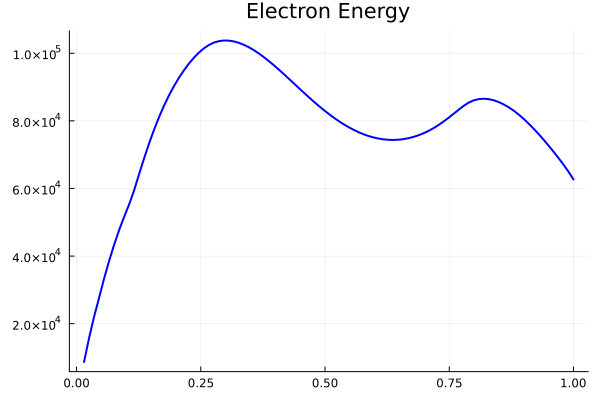

​


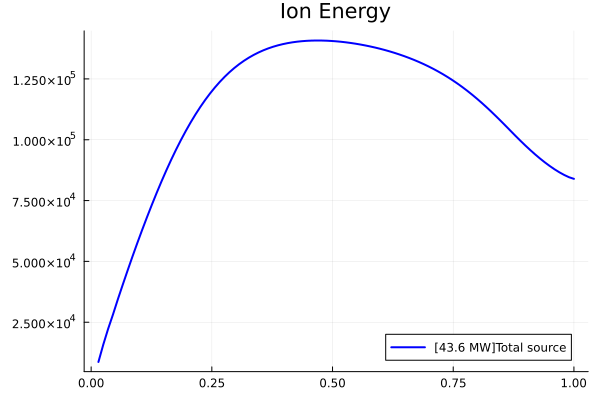

​


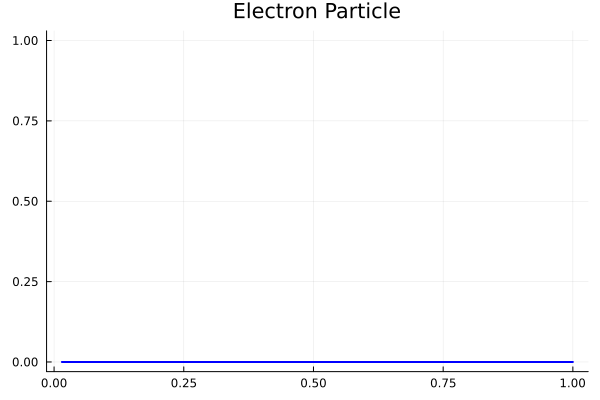

​


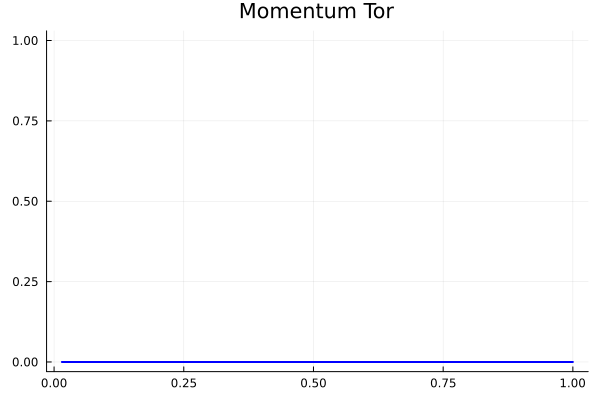

​


LoadError: Flux surface at ψ=-6.681343952336757e-9 is not open; ψ=[29.661506657140567...-1.6379236747388156e-5]

In [102]:
dd.global_time = 2000.
FUSE.digest(dd)

In [103]:
dd_init = deepcopy(dd);

[ Info: TEQUILA


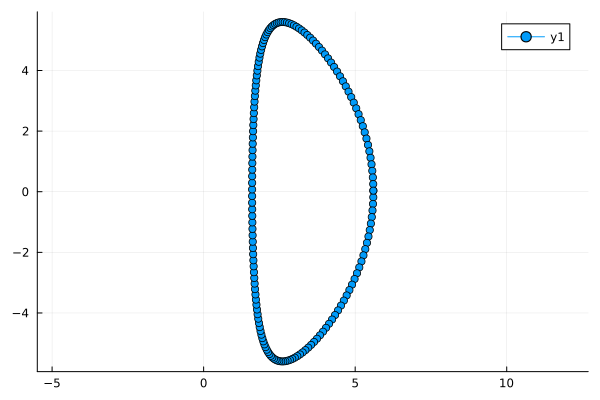

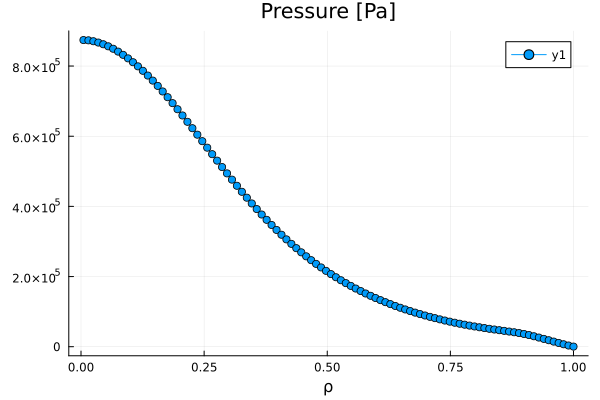

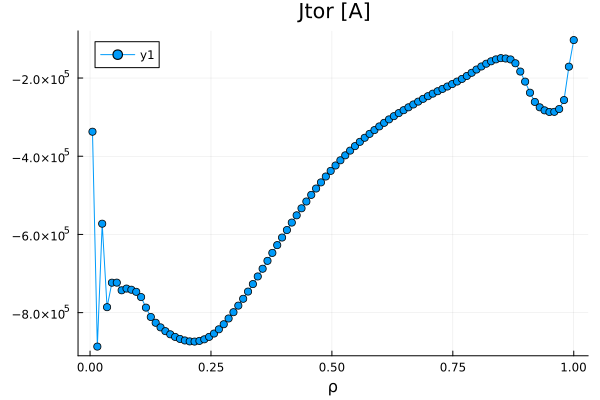

LoadError: Provided F_dF_dψ, Jt, or Jt_R profile produces regions with current opposite total current
       Not allowed since Ψ becomes nonmonotonic - Please correct input profile

In [104]:
dd = deepcopy(dd_init)
act= FUSE.ParametersActors();

dd.global_time = 1600.
act.ActorTGLF.model= :TGLFNN
act.ActorTGLF.lump_ions = false
#FUSE.ActorTGLF(dd,act)
#dd.equilibrium.time_slice[].profiles_1d.j_tor = abs.(dd.equilibrium.time_slice[].profiles_1d.j_tor)
actor_teq = FUSE.ActorTEQUILA(dd,act;ip_from=:equilibrium)
#plot(dd.equilibrium)

In [105]:
dd_init.equilibrium.time_slice[].profiles_2d

profiles_2d
└─ 1
   ├─ b_field_r ➡ 101×101 Matrix{Float64} [T] (all 0.0)
   ├─ b_field_tor ➡ 101×101 Matrix{Float64} [T]
   ├─ b_field_z ➡ 101×101 Matrix{Float64} [T] (all 0.0)
   ├─ grid
   │  ├─ dim1 ➡ 101-element Vector{Float64} [mixed]
   │  └─ dim2 ➡ 101-element Vector{Float64} [mixed]
   ├─ grid_type
   │  ├─ description ➡ "Cylindrical R,Z ala eqdsk (R=dim1, Z=dim2). In this case the position arrays should not be filled since they are redundant with g..."
   │  ├─ index ➡ 1
   │  └─ name ➡ "rectangular"
   ├─ j_tor ➡ Function [A.m^-2]
   ├─ phi ➡ 101×101 Matrix{Float64} [Wb]
   ├─ psi ➡ 101×101 Matrix{Float64} [Wb]
   ├─ r ➡ 101×101 Matrix{Float64} [m]
   └─ z ➡ 101×101 Matrix{Float64} [m]


In [106]:
ini,act = FUSE.case_parameters(:STEP);

ini_new = FUSE.ParametersInits()

ini_new.general.init_from=  :ods
ini_new.time.simulation_start = 1500.
FUSE.ini_from_ods!(ini;restore_expressions=false)
#dd.global_time = X
#dd_init.global_time = 1500.

ini_new.general.dd = deepcopy(dd_init);

dd = IMAS.dd()
ini_new.general.init_from=  :scalars

FUSE.init(dd,ini_new,act);

[ Info: SteadyStateCurrent


LoadError: Attempt to access 0-element IMASDD.IDSvector{IMASDD.equilibrium__time_slice{Float64}} at index [1]. Need to `resize!(ids, 1)`.

In [107]:
dd

dd
├─ balance_of_plant
│  ├─ Q_plant ➡ Function
│  ├─ power_electric_net ➡ Function [W]
│  └─ power_electric_plant_operation
│     └─ total_power ➡ Function [W]
├─ build
│  └─ tf
│     ├─ ripple ➡ Function
│     └─ wedge_thickness ➡ Function [m]
├─ core_profiles
│  └─ global_quantities
│     ├─ beta_tor_norm ➡ Function
│     ├─ current_bootstrap ➡ Function [A]
│     ├─ current_non_inductive ➡ Function [A]
│     ├─ ip ➡ Function [A]
│     └─ v_loop ➡ Function [V]
├─ core_sources
├─ core_transport
├─ costing
│  ├─ cost_decommissioning
│  │  └─ cost ➡ Function [$M]
│  ├─ cost_direct_capital
│  │  └─ cost ➡ Function [$M]
│  └─ cost_operations
│     └─ yearly_cost ➡ Function [$M/year]
├─ divertors
├─ equilibrium
├─ mhd
├─ nbi
├─ pulse_schedule
│  ├─ tf
│  │  ├─ b_field_tor_vacuum
│  │  │  └─ reference ➡ Function [T]
│  │  ├─ b_field_tor_vacuum_r
│  │  │  └─ reference ➡ Function [mixed]
│  │  ├─ r0 ➡ Function [m]
│  │  └─ time ➡ Function [s]
│  └─ time ➡ Function [s]
├─ stability
│  └─ all_c

In [108]:
plot(dd.equilibrium.time_slice[1500.])

LoadError: Attempt to access 0-element IMASDD.IDSvector{IMASDD.equilibrium__time_slice{Float64}} at index [1]. Need to `resize!(ids, 1)`.

In [ ]:
# setup ini
ini, act = FUSE.case_parameters(:ITER;init_from=:scalars)

# core profiles
ini.core_profiles.zeff = 2.5 ↔ [1.4,4.5]
ini.core_profiles.greenwald_fraction_ped = 0.2 ↔[0.2,0.75*0.9]
ini.core_profiles.temp_shape 

# H&CD
ini.nb_unit[1].power_launched = 33.4e6 ↔ [0.0,33.4e6]
ini.nb_unit[1].beam_energy = 1e6 ↔ [1e5,1e6]
ini.ec_launcher[1].power_launched = 20e6 ↔ [0.0,20e6]
ini.ec_launcher[1].rho_0 = 0.3 ↔ [0.1,0.9]
ini.ic_antenna[1].power_launched = 24e6 ↔ [0.0,24e6]
ini.lh_antenna[1].power_launched = 10e6 ↔ [0.0,10e6]

# Change act for running ITER for IDA
act.ActorCoreTransport.model = :FluxMatcher
act.ActorFluxMatcher.evolve_pedestal = false
act.ActorTGLF.warn_nn_train_bounds = false
act.ActorFluxMatcher.evolve_rotation = :fixed
act.ActorFluxMatcher.evolve_densities = :flux_match

In [ ]:
# study is the actor equivalent of actors, here sty, act and outputs are kept of the workflow
study = FUSE.StudyDatabaseGenerator(sty,ini, act; n_workers=2); # it is possible to pass in keyword arguments to sty

# instantiating the study will also setup the study i.e. FUSE.setup(study);

In [ ]:
# for now you will have to import FUSE everywhere in your distributed computing
using Distributed
@everywhere import FUSE


In [ ]:
FUSE.run(study);   # runs the study, this also writes the dataframes

# at the end of the run workers are released so you will have to setup again if you want to run more

In [ ]:
# data for this workflow is stored in a dictionary of dataframes study.dataframes_dict
study.dataframes_dict["outputs_summary"]



In [ ]:
# analyze the study results 
FUSE.analyze(study);


